<h1>Importing Dataset</h1>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>Importing Dataset</h1>

In [89]:
dataset=pd.read_csv('Car_Purchasing_Data.csv')

x=dataset.iloc[:,3:-1].values       #array of all independent variables
y=dataset.iloc[:,-1].values 
y=y.reshape(len(y),1)              #array of dependent variables

<h1>Splitting dataset into train And test data(20%)</h1>

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

<h1>A brief study of the data </h1>

In [91]:
X=dataset.iloc[:,3:]

In [92]:
X.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


<h3>Note:Here we can see that none of the entries in the column is empty. describe function gives us information about the columns depending upon the type of the data in the column. (furthur visualisation down)</h3>

In [93]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


<h1>Feature Scaling</h1>

In [94]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X_train=sc_x.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)


(400, 1)

<h1>Training Model</h1>

In [95]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\sourav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

<h1>Predicting New Values On Test Data</h1>

In [96]:
y_pred=regressor.predict(sc_x.transform(X_test))
y_pred=sc_y.inverse_transform(y_pred)

In [97]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[36376.   36638.21]
 [31649.54 32737.8 ]
 [57754.08 57461.51]
 [39047.99 39083.94]
 [23687.95 20653.21]
 [39040.2  39270.58]
 [46586.48 46937.17]
 [30161.1  30757.66]
 [47864.51 47979.49]
 [47912.67 47869.83]
 [28984.83 27889.95]
 [63769.1  64147.29]
 [35644.51 35457.15]
 [28634.01 29556.79]
 [43217.53 43503.97]
 [55250.86 60763.25]
 [48696.06 48383.69]
 [23483.38 19525.3 ]
 [28058.82 29052.1 ]
 [41848.03 41673.45]
 [42229.77 42288.81]
 [49312.54 49142.51]
 [43756.78 44430.63]
 [47001.9  46935.73]
 [40695.53 41034.28]
 [42673.47 42774.36]
 [56152.48 54827.52]
 [32500.84 33428.4 ]
 [47744.52 50441.62]
 [44160.18 44418.61]
 [37753.18 38148.  ]
 [22167.06 19553.27]
 [40158.28 39892.93]
 [41365.7  41903.65]
 [62756.8  70598.97]
 [30952.64 32208.38]
 [35594.43 12895.71]
 [35219.47 30736.58]
 [42528.52 41221.25]
 [40815.92 40879.19]
 [52025.01 55700.83]
 [26566.22 27586.2 ]
 [53641.76 52474.72]
 [45388.13 45805.67]
 [49864.04 49730.53]
 [39611.13 40022.17]
 [41641.07 41913.54]
 [42392.95 42

<h1>Mean Absolute Error</h1>

In [98]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1077.8007062549807

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9367475503527568

<h4>The mean absolute error is an indicator that our model is overall good overcoming the problems of overfitting and underfitting</h4>

<h1>Data Visualisation</h1>

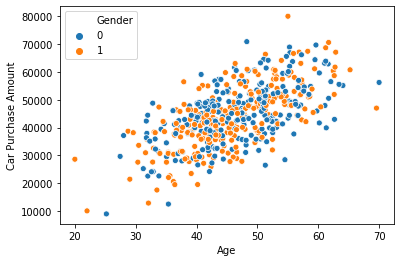

In [38]:
import seaborn as sns
sns.scatterplot(x=X['Age'],y=X['Car Purchase Amount'],hue=X['Gender'])


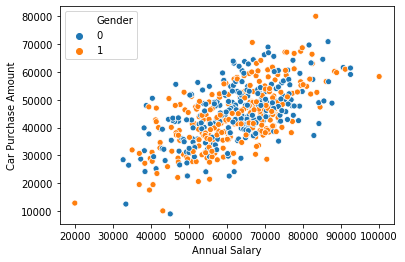

In [39]:
sns.scatterplot(x=X['Annual Salary'],y=X['Car Purchase Amount'],hue=X['Gender'])


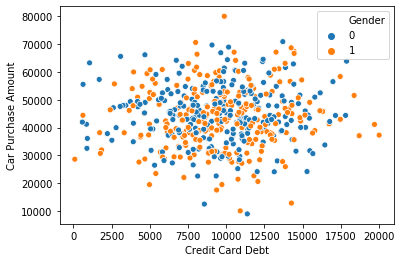

In [40]:
sns.scatterplot(x=X['Credit Card Debt'],y=X['Car Purchase Amount'],hue=X['Gender'])


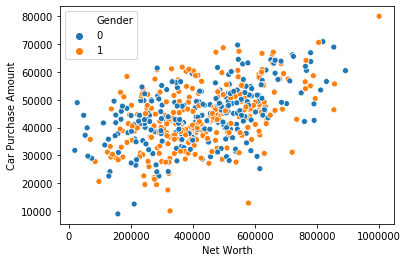

In [41]:
sns.scatterplot(x=X['Net Worth'],y=X['Car Purchase Amount'],hue=X['Gender'])

In [42]:
X["Age"]

0      41.851720
1      40.870623
2      43.152897
3      58.271369
4      57.313749
         ...    
495    41.462515
496    37.642000
497    53.943497
498    59.160509
499    46.731152
Name: Age, Length: 500, dtype: float64